<a href="https://colab.research.google.com/github/jason96819/Studying/blob/main/Coding_Algorithm/Coding_240325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1일 1코딩 알고리즘 연습

## 24년 3월 23일 토요일

달리기경 - https://school.programmers.co.kr/learn/courses/30/lessons/178871

얀에서는 매년 달리기 경주가 열립니다. 해설진들은 선수들이 자기 바로 앞의 선수를 추월할 때 추월한 선수의 이름을 부릅니다. 예를 들어 1등부터 3등까지 "mumu", "soe", "poe" 선수들이 순서대로 달리고 있을 때, 해설진이 "soe"선수를 불렀다면 2등인 "soe" 선수가 1등인 "mumu" 선수를 추월했다는 것입니다. 즉 "soe" 선수가 1등, "mumu" 선수가 2등으로 바뀝니다.

선수들의 이름이 1등부터 현재 등수 순서대로 담긴 문자열 배열 players와 해설진이 부른 이름을 담은 문자열 배열 callings가 매개변수로 주어질 때, 경주가 끝났을 때 선수들의 이름을 1등부터 등수 순서대로 배열에 담아 return 하는 solution 함수를 완성해주세요.

In [ ]:
players	= ["mumu", "soe", "poe", "kai", "mine"]
callings = ["kai", "kai", "mine", "mine"]
result = ["mumu", "kai", "mine", "soe", "poe"]

In [ ]:
for i in callings:
    num = players.index(i)
    players[num-1], players[num] = players[num], players[num-1]
players

['mumu', 'kai', 'mine', 'soe', 'poe']

In [ ]:
def solution(players, callings):

    for i in callings:
        num = players.index(i)
        players[num-1], players[num] = players[num], players[num-1]

    return players

## 시간초과!!!!!

5 ≤ players의 길이 ≤ 50,000

2 ≤ callings의 길이 ≤ 1,000,000

때문에 최악의 결과 O(n^2)으로 1,000,000 × 50,000번을 반복

In [ ]:
def solution(players, callings):
    result = {player: i for i, player in enumerate(players)}                    # 선수: 등수

    for c in callings:
        i = result[c]                                                                   # 호명된 선수의 현재 등수
        result[c] -= 1                                                                    # 하나 앞 등수로 바꿔줌 -1
        result[players[i-1]] += 1                                                         # 앞에 위치했던 선수의 등수 +1
        players[i-1], players[i] = players[i], players[i-1]            # 위치 변경

    return players

solution(players, callings)

['mumu', 'kai', 'mine', 'soe', 'poe']

In [ ]:
result = {player: i for i, player in enumerate(players)}                                # 딕셔너리 생성

In [ ]:
print(f"{result} : 첫번째 꺼")
print("="*50)
for calling in callings:
    idx = result[calling]
    result[calling] -= 1
    print(idx,", ",calling)
    print(f"{result} : 해당 인덱스 -1 하기")
    result[players[idx-1]] += 1
    print(f"{result} : 그 앞 인덱스 +1 하기")
    print("="*40)

players[idx-1], players[idx] = players[idx], players[idx-1]                             # 위치 변경
players

{'mumu': 0, 'soe': 1, 'poe': 2, 'kai': 3, 'mine': 4} : 첫번째 꺼
3 ,  kai
{'mumu': 0, 'soe': 1, 'poe': 2, 'kai': 2, 'mine': 4} : 해당 인덱스 -1 하기
{'mumu': 0, 'soe': 1, 'poe': 3, 'kai': 2, 'mine': 4} : 그 앞 인덱스 +1 하기
2 ,  kai
{'mumu': 0, 'soe': 1, 'poe': 3, 'kai': 1, 'mine': 4} : 해당 인덱스 -1 하기
{'mumu': 0, 'soe': 2, 'poe': 3, 'kai': 1, 'mine': 4} : 그 앞 인덱스 +1 하기
4 ,  mine
{'mumu': 0, 'soe': 2, 'poe': 3, 'kai': 1, 'mine': 3} : 해당 인덱스 -1 하기
{'mumu': 0, 'soe': 2, 'poe': 3, 'kai': 2, 'mine': 3} : 그 앞 인덱스 +1 하기
3 ,  mine
{'mumu': 0, 'soe': 2, 'poe': 3, 'kai': 2, 'mine': 2} : 해당 인덱스 -1 하기
{'mumu': 0, 'soe': 2, 'poe': 4, 'kai': 2, 'mine': 2} : 그 앞 인덱스 +1 하기


['mumu', 'soe', 'kai', 'poe', 'mine']

In [ ]:
# 전문가 정답

def solution(players, callings):
    pla_dic = {key: i for i, key in enumerate(players)}

    for p in callings:
        c = pla_dic[p]
        pla_dic[p] -= 1
        pla_dic[players[c-1]] += 1
        players[c-1], players[c] = players[c], players[c-1]

    return players

## 24년 3월 25일 월요일

공원산책 - https://school.programmers.co.kr/learn/courses/30/lessons/172928

지나다니는 길을 'O', 장애물을 'X'로 나타낸 직사각형 격자 모양의 공원에서 로봇 강아지가 산책을 하려합니다. 산책은 로봇 강아지에 미리 입력된 명령에 따라 진행하며, 명령은 다음과 같은 형식으로 주어집니다.

["방향 거리", "방향 거리" … ]
예를 들어 "E 5"는 로봇 강아지가 현재 위치에서 동쪽으로 5칸 이동했다는 의미입니다. 로봇 강아지는 명령을 수행하기 전에 다음 두 가지를 먼저 확인합니다.

주어진 방향으로 이동할 때 공원을 벗어나는지 확인합니다.
주어진 방향으로 이동 중 장애물을 만나는지 확인합니다.
위 두 가지중 어느 하나라도 해당된다면, 로봇 강아지는 해당 명령을 무시하고 다음 명령을 수행합니다.
공원의 가로 길이가 W, 세로 길이가 H라고 할 때, 공원의 좌측 상단의 좌표는 (0, 0), 우측 하단의 좌표는 (H - 1, W - 1) 입니다.
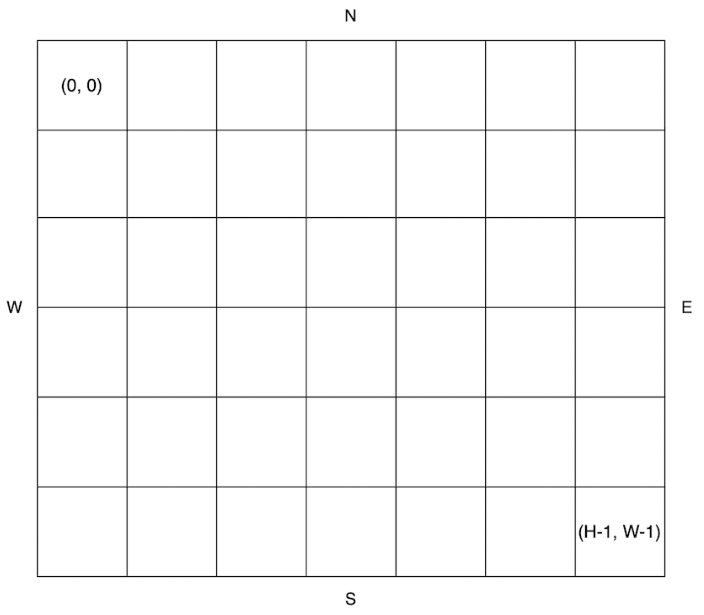

공원을 나타내는 문자열 배열 park, 로봇 강아지가 수행할 명령이 담긴 문자열 배열 routes가 매개변수로 주어질 때, 로봇 강아지가 모든 명령을 수행 후 놓인 위치를 [세로 방향 좌표, 가로 방향 좌표] 순으로 배열에 담아 return 하도록 solution 함수를 완성해주세요.

In [ ]:
def solution(park, routes):
    answer = []
    return answer

In [ ]:
park_1 = ["SOO","OOO","OOO"]
routes_1 = ["E 2","S 2","W 1"]
result_1 = [2,1]

In [ ]:
park_2 = ["SOO","OXX","OOO"]
routes_2 = ["E 2","S 2","W 1"]
result_2 = [0,1]

In [ ]:
park_3 = ["OSO","OOO","OXO","OOO"]
routes_3 = ["E 2","S 3","W 1"]
result_3 = [0,0]

In [ ]:
import numpy as np

m = []

for i in range(len(park_3)):
    for j in range(len(park_3[0])):
        m.append(park_3[i][j])

m = np.array(m)
m = m.reshape(len(park_3), -1)
result = m.tolist()
result

[['O', 'S', 'O'], ['O', 'O', 'O'], ['O', 'X', 'O'], ['O', 'O', 'O']]

In [ ]:
for i in range(len(result)):
    for j in range(len(result[i])):
        if result[i][j] == 'S':
            p = [i, j]
p

[0, 1]

In [ ]:
X_list = []

for i in range(len(result)):
    for j in range(len(result[i])):
        if result[i][j] == 'X':
            x_list = [i ,j]
            X_list.append(x_list)
X_list

[[2, 1]]

In [ ]:
dis_dict = {}

for route in routes_3:
    direction, distance = route.split()
    dis_dict[direction] = int(distance)
dis_dict

{'E': 2, 'S': 3, 'W': 1}

In [ ]:
for k, v in dis_dict.items():
    print(p, k, "시작합니다.")
    if k == "E":
        p[1] += int(v)
        print(p, "이동완료.")
        if p[1] >= len(result[0]):
            p[1] -= int(v)
            print(p, "거리제한입니다. 돌아갑니다.")
        else:
            print("거리안에 있습니다.")
            for i in range(len(X_list)):
                if p[0] == X_list[i][0] and p[1] >= X_list[i][1]:
                    print('하지만, 장애물에 걸렸습니다. 돌아갑니다.')
                    p[1] -= int(v)
    elif k == "S":
        p[0] += int(v)
        print(p, "이동완료.")
        if p[0] >= len(result):
            p[0] -= int(v)
            print(p, "거리제한입니다. 돌아갑니다.")
        else:
            print("거리안에 있습니다.")
            for i in range(len(X_list)):
                if p[1] == X_list[i][1] and p[0] >= X_list[i][0]:
                    print('하지만, 장애물에 걸렸습니다. 돌아갑니다.')
                    p[0] -= int(v)
    elif k == "W":
        p[1] -= int(v)
        print(p, "이동완료.")
        if p[1] < 0:
            p[1] += int(v)
            print(p, "거리제한입니다. 돌아갑니다.")
        else:
            print("거리안에 있습니다.")
            for i in range(len(X_list)):
                if p[0] == X_list[i][0] and p[1] <= X_list[i][1]:
                    print('하지만, 장애물에 걸렸습니다. 돌아갑니다.')
                    p[1] += int(v)
    elif k == "N":
        p[0] -= int(v)
        print(p, "이동완료.")
        if p[0] < 0:
            p[0] += int(v)
            print(p, "거리제한입니다. 돌아갑니다.")
        else:
            print("거리안에 있습니다.")
            for i in range(len(X_list)):
                if p[1] == X_list[i][1] and p[0] <= X_list[i][0]:
                    print('하지만, 장애물에 걸렸습니다. 돌아갑니다.')
                    p[0] += int(v)
p

[0, 1] E 시작합니다.
[0, 3] 이동완료.
[0, 1] 거리제한입니다. 돌아갑니다.
[0, 1] S 시작합니다.
[3, 1] 이동완료.
거리안에 있습니다.
하지만, 장애물에 걸렸습니다. 돌아갑니다.
[0, 1] W 시작합니다.
[0, 0] 이동완료.
거리안에 있습니다.


[0, 0]

In [ ]:
import numpy as np

def make_map(park):
    m = []
    for i in range(len(park)):
        for j in range(len(park[0])):
            m.append(park[i][j])
    m = np.array(m)
    m = m.reshape(len(park), -1)
    res = m.tolist()
    return res

def start_point(result):
    for i in range(len(result)):
        for j in range(len(result[i])):
            if result[i][j] == 'S':
                p = [i, j]
    return p

def make_x_list(result):
    X_list = []
    for i in range(len(result)):
        for j in range(len(result[i])):
            if result[i][j] == 'X':
                x_list = [i ,j]
                X_list.append(x_list)
    return X_list

def routes_dict(routes):
    dis_dict = {}
    for route in routes:
        direction, distance = route.split()
        dis_dict[direction] = int(distance)
    return dis_dict

In [ ]:
import numpy as np

def solution(park, routes):

    m = []
    for i in range(len(park)):
        for j in range(len(park[0])):
            m.append(park[i][j])
    m = np.array(m)
    m = m.reshape(len(park), -1)
    result = m.tolist()

    for i in range(len(result)):
        for j in range(len(result[i])):
            if result[i][j] == 'S':
                sp = [i, j]

    X_list = []
    for i in range(len(result)):
        for j in range(len(result[i])):
            if result[i][j] == 'X':
                x_list = [i ,j]
                X_list.append(x_list)

    dis_dict = {}
    for route in routes:
        direction, distance = route.split()
        dis_dict[direction] = int(distance)

    for k, v in dis_dict.items():
        if k == "E":
            sp[1] += int(v)
            if sp[1] >= len(result[0]):
                sp[1] -= int(v)
            else:
                for i in range(len(X_list)):
                    if sp[0] == X_list[i][0] and sp[1] >= X_list[i][1]:
                        sp[1] -= int(v)
        elif k == "S":
            sp[0] += int(v)
            if sp[0] >= len(result):
                sp[0] -= int(v)
            else:
                for i in range(len(X_list)):
                    if sp[1] == X_list[i][1] and sp[0] >= X_list[i][0]:
                        sp[0] -= int(v)
        elif k == "W":
            sp[1] -= int(v)
            if sp[1] < 0:
                sp[1] += int(v)
            else:
                for i in range(len(X_list)):
                    if sp[0] == X_list[i][0] and sp[1] <= X_list[i][1]:
                        sp[1] += int(v)
        elif k == "N":
            sp[0] -= int(v)
            if sp[0] < 0:
                sp[0] += int(v)
            else:
                for i in range(len(X_list)):
                    if sp[1] == X_list[i][1] and sp[0] <= X_list[i][0]:
                        sp[0] += int(v)
    return sp

In [ ]:
solution(park_1, routes_1)

[4, 1]

In [ ]:
solution(park_2, routes_2)

[0, 1]

In [ ]:
solution(park_3, routes_3)

[0, 0]

In [ ]:
park_1 = ["SOOOO","OXOXX","OOOOO", "OOOOO", "OOOOO"]
routes_1 = ["E 2","S 4","W 1", "N 3"]

In [ ]:
# 전문가 1

class Dog:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.g = {"N": (-1, 0), "W": (0, -1), "E": (0, 1), "S": (1, 0)}

    def move(self, park, direction, distance):
        i, j = self.g[direction]
        x, y = self.x + (i * distance), self.y + (j * distance)
        if x < 0 or y < 0 or x >= len(park) or y >= len(park[0]):
            return park
        elif "X" in park[x][min(self.y, y) : max(self.y, y) + 1] or "X" in [
            row[y] for row in park[min(self.x, x) : max(self.x, x)]
        ]:
            return park
        park[self.x][self.y] = "O"
        park[x][y] = "S"
        self.x = x
        self.y = y
        return park

    @classmethod
    def detect_start_dogs_location(self, park):
        for i, row in enumerate(park):
            for j, item in enumerate(row):
                if item == "S":
                    return i, j


def solution(park, routes):
    park = [list(row) for row in park]
    x, y = Dog.detect_start_dogs_location(park)

    dog = Dog(x, y)

    for route in routes:
        direction, distance = route.split()
        park = dog.move(park, direction, int(distance))

    return [dog.x, dog.y]

In [ ]:
# 전문가 2

def solution(park, routes):
    h = len(park)
    w = len(park[0])
    x,y = 0,0

    nav = {
        'S': [1,0],
        'N':[-1,0],
        'W': [0,-1],
        'E':[0,1]
    }

    for i in range(h):
        for j in range(w):
            if park[i][j] == "S":
                x = i
                y = j

    for route in routes:
        direction, distance = route.split()
        distance = int(distance)
        flag = 0
        step_x = x
        step_y = y
        for i in range(1,distance+1):
            step_x += nav[direction][0]
            step_y += nav[direction][1]

            if step_x >= h or step_x <= -1 or step_y >= w or step_y <= -1 or park[step_x][step_y] == 'X':
                flag = 1
                break

        if(flag == 0):
            x += nav[direction][0] * distance
            y += nav[direction][1] * distance

    answer = [x,y]
    return answer